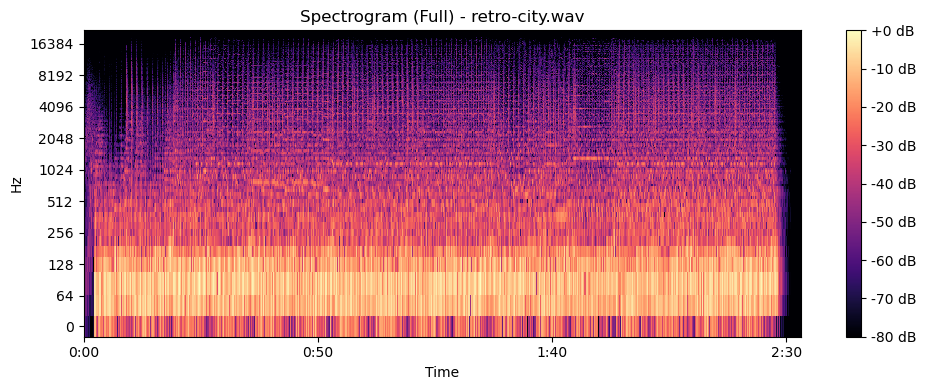

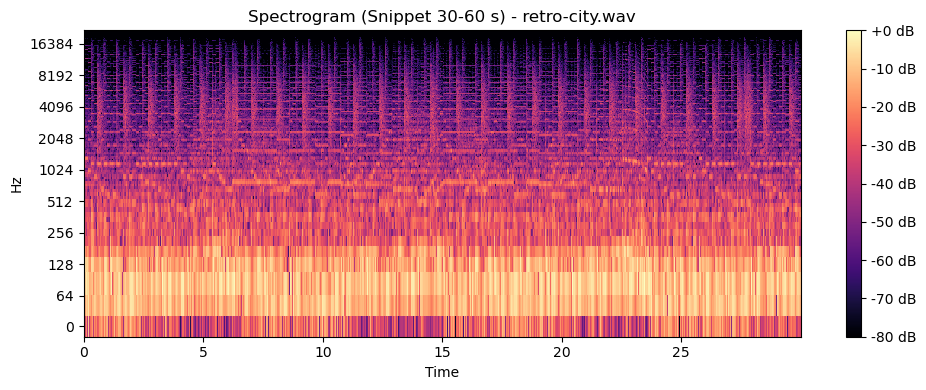

Metrics for snippet of retro-city.wav:
 - Spectral Centroid (Mean): 1929.2525210131994
 - Spectral Bandwidth (Mean): 2849.499062116401
 - Spectral Rolloff (Mean): 4256.957592093169
 - RMS (Mean): 0.16943062823420682


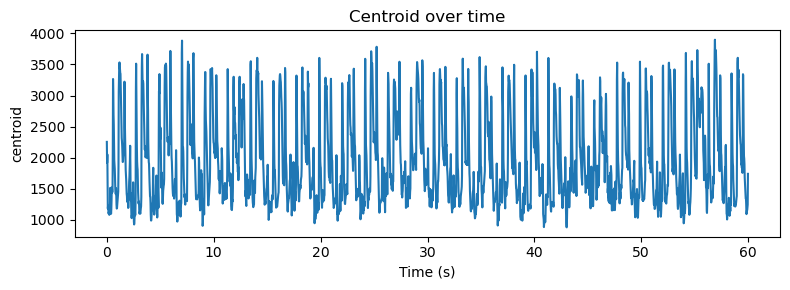

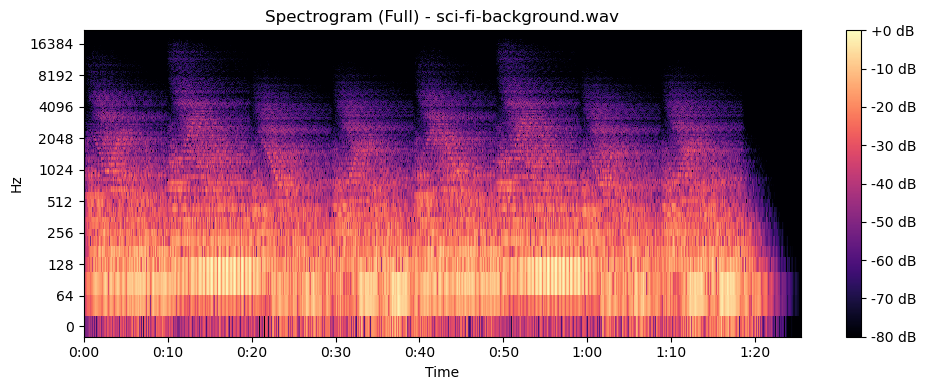

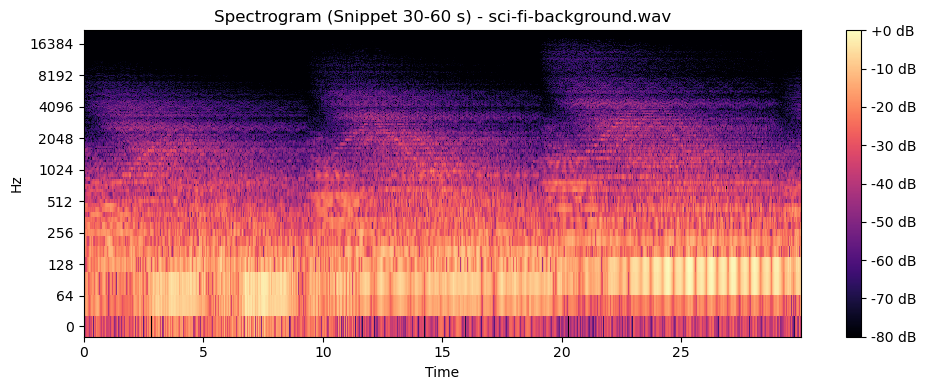

Metrics for snippet of sci-fi-background.wav:
 - Spectral Centroid (Mean): 774.226065381023
 - Spectral Bandwidth (Mean): 1517.48131215863
 - Spectral Rolloff (Mean): 1325.3086527065595
 - RMS (Mean): 0.019928785761188044


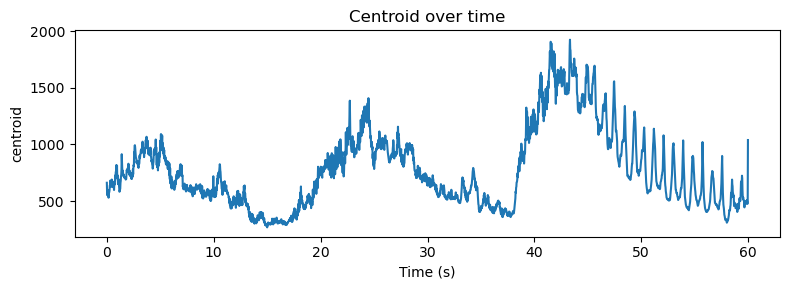

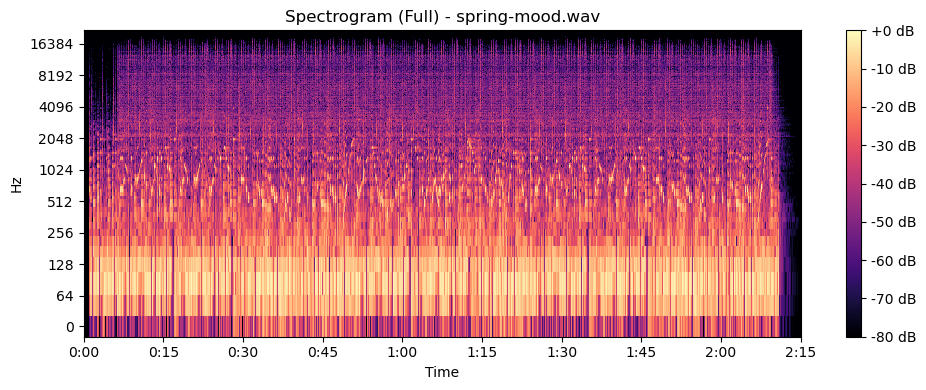

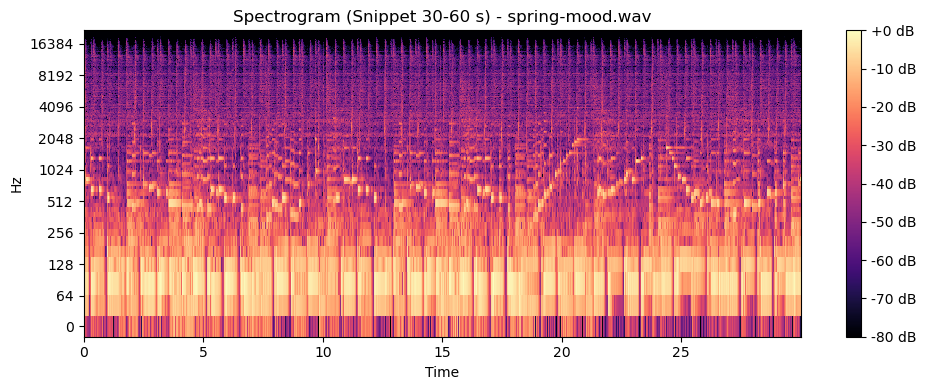

Metrics for snippet of spring-mood.wav:
 - Spectral Centroid (Mean): 2781.7501876814595
 - Spectral Bandwidth (Mean): 3746.9223775546666
 - Spectral Rolloff (Mean): 6894.3166443437985
 - RMS (Mean): 0.15658703877680766


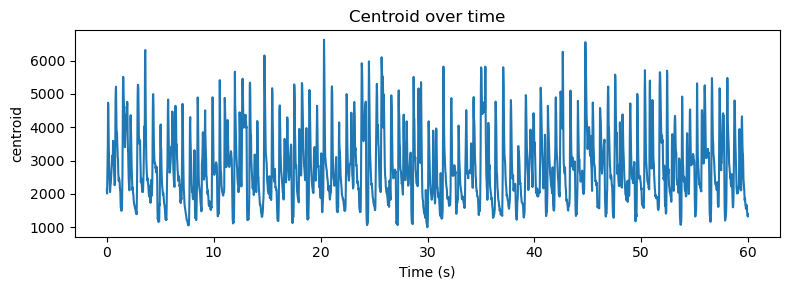

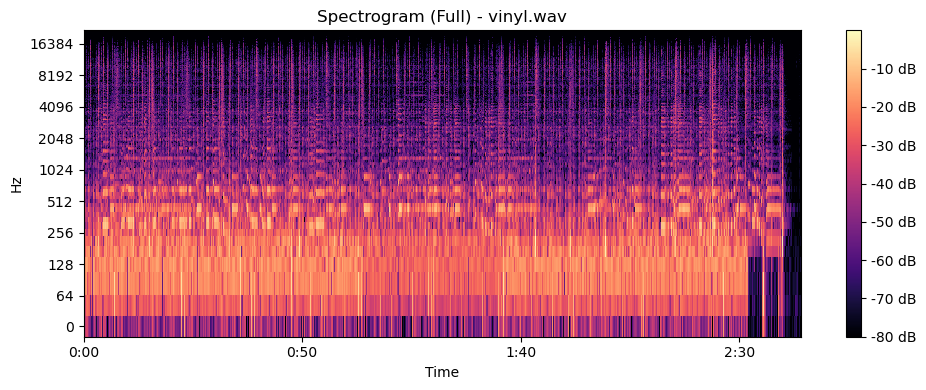

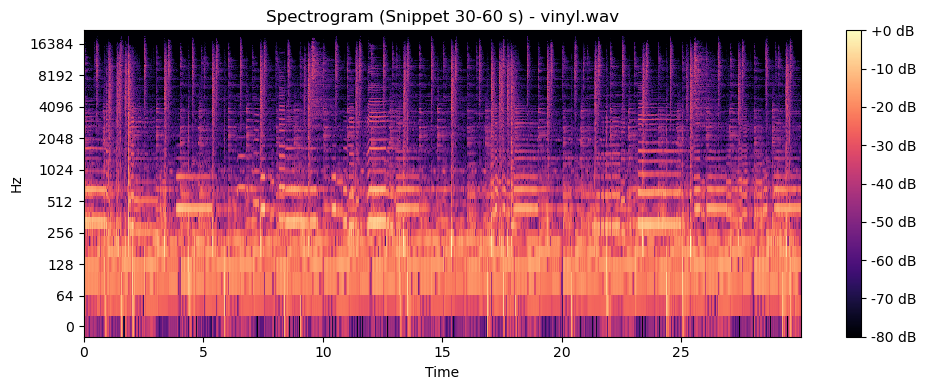

Metrics for snippet of vinyl.wav:
 - Spectral Centroid (Mean): 2349.3833879564113
 - Spectral Bandwidth (Mean): 3136.7741623266697
 - Spectral Rolloff (Mean): 5075.2359774090555
 - RMS (Mean): 0.08913292067236783


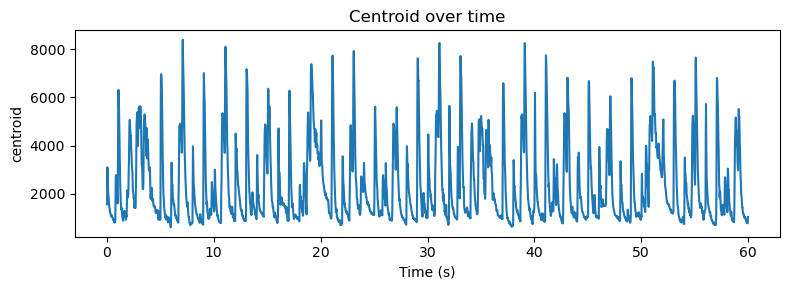

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def plot_full_spectrogram(audio_path, n_fft=1024, hop_length=512, window='hann', sr=None):

    y, sr = librosa.load(audio_path, sr=sr)
    
    # Compute STFT
    D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length, window=window)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
    # Plot spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_db, sr=sr, hop_length=hop_length,
                             x_axis='time', y_axis='log')
    plt.title(f"Spectrogram (Full) - {audio_path}")
    plt.colorbar(format="%+2.f dB")
    plt.tight_layout()
    plt.show()


def plot_spectrogram_snippet(audio_path, start_sec=30, end_sec=60,n_fft=1024, hop_length=512, window='hann', sr=None):

    y, sr = librosa.load(audio_path, sr=sr)
    
    start_sample = int(start_sec * sr)
    end_sample = int(end_sec * sr)
    
    # Safety check in case audio is shorter than the desired snippet
    end_sample = min(end_sample, len(y))
    
    y_snippet = y[start_sample:end_sample]
    
    D_snippet = librosa.stft(y_snippet, n_fft=n_fft, hop_length=hop_length, window=window)
    S_db_snippet = librosa.amplitude_to_db(np.abs(D_snippet), ref=np.max)
    
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_db_snippet, sr=sr, hop_length=hop_length,
                             x_axis='time', y_axis='log')
    plt.title(f"Spectrogram (Snippet {start_sec}-{end_sec} s) - {audio_path}")
    plt.colorbar(format="%+2.f dB")
    plt.tight_layout()
    plt.show()
    

def compute_metrics(audio_path, start_sec=30, end_sec=60, sr=None):

    y, sr = librosa.load(audio_path, sr=sr)
    
    start_sample = int(start_sec * sr)
    end_sample = int(end_sec * sr)
    end_sample = min(end_sample, len(y))
    
    y_snippet = y[start_sample:end_sample]
    
    # Compute metrics frame by frame
    S = np.abs(librosa.stft(y_snippet))
    
    centroid = librosa.feature.spectral_centroid(S=S, sr=sr)
    bandwidth = librosa.feature.spectral_bandwidth(S=S, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(S=S, sr=sr)
    rms = librosa.feature.rms(S=S)
    
    # Calculate means
    centroid_mean = np.mean(centroid)
    bandwidth_mean = np.mean(bandwidth)
    rolloff_mean = np.mean(rolloff)
    rms_mean = np.mean(rms)
    
    metrics_dict = {
        "spectral_centroid_mean": centroid_mean,
        "spectral_bandwidth_mean": bandwidth_mean,
        "spectral_rolloff_mean": rolloff_mean,
        "rms_mean": rms_mean,
        "centroid_time_series": centroid,
        "bandwidth_time_series": bandwidth,
        "rolloff_time_series": rolloff,
        "rms_time_series": rms
    }
    
    return metrics_dict


def plot_metrics_time_series(metrics_dict, sr, hop_length=512, metric_name="centroid"):

    valid_metrics = {
        "centroid": "centroid_time_series",
        "bandwidth": "bandwidth_time_series",
        "rolloff": "rolloff_time_series",
        "rms": "rms_time_series"
    }
    
    if metric_name not in valid_metrics:
        print("Invalid metric name.")
        return

    data = metrics_dict[valid_metrics[metric_name]].flatten()  
    frames = range(len(data))
    t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
    
    plt.figure(figsize=(8,3))
    plt.plot(t, data)
    plt.title(f"{metric_name.capitalize()} over time")
    plt.xlabel("Time (s)")
    plt.ylabel(metric_name)
    plt.tight_layout()
    plt.show()


audio_files = [
    "retro-city.wav","sci-fi-background.wav","spring-mood.wav","vinyl.wav"
]

for file in audio_files:
    plot_full_spectrogram(file)

    plot_spectrogram_snippet(file)

    metrics = compute_metrics(file)
    print(f"Metrics for snippet of {file}:")
    print(" - Spectral Centroid (Mean):", metrics["spectral_centroid_mean"])
    print(" - Spectral Bandwidth (Mean):", metrics["spectral_bandwidth_mean"])
    print(" - Spectral Rolloff (Mean):", metrics["spectral_rolloff_mean"])
    print(" - RMS (Mean):", metrics["rms_mean"])

    plot_metrics_time_series(metrics, sr=22050, hop_length=512, metric_name="centroid")
